In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from vibration_utils import *

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
fsamp=5000
res=50000
freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change


In [4]:
# settings to the ASM003 from Gautam - settings are the same as for me
fExc = 13.1415
excAmp = 100e-3/2 * 15 #mV, the factor of 15 gets us to the actual voltage applied to the ASM003 piezos.
# Calibration numbers from elog 337
xCal, yCal = 7.83e-6, 5.54e-6 # urad/V
excAmpX, excAmpY = xCal*excAmp*1.27000000e-02, yCal*excAmp*1.27000000e-02 # m, last factor is to convert to motion at trap focus

In [5]:
dates=[20220629]#,20220628]
for date in dates:
    folderName="/data/new_trap/%d/ASMcal/2/Xexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    calibrationFactorX = np.mean([np.abs(digital_demod(files[i].x2,13.1415))/excAmpX for i in range(10)])
    print(calibrationFactorX)
    folderName="/home/data_transfer/data_from_windows/%d/ASMcal/2/Yexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    calibrationFactorY= np.mean([np.abs(digital_demod(files[i].y2,13.1415))/excAmpY for i in range(10)])
    print(calibrationFactorY)

  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
286523.94019857974


100%|██████████| 10/10 [00:02<00:00,  4.17it/s]


10  files in folder
10  files loaded
192921.43963139376


In [6]:
dates=[20220630,20220701]#,20220628]
for date in dates:
    folderName="/data/new_trap/%d/ASMcal/Xexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    calibrationFactorX = np.mean([np.abs(digital_demod(files[i].x2,13.1415))/excAmpX for i in range(10)])
    print("calX is", calibrationFactorX)
    folderName="/data/new_trap/%d/ASMcal/InputsTerminated/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    testFactorX = np.mean([np.abs(digital_demod(files[i].x2,13.1415))/excAmpX for i in range(10)])
    testFactorY = np.mean([np.abs(digital_demod(files[i].y2,13.1415))/excAmpY for i in range(10)])
    print(testFactorX)
    print(testFactorY)
    folderName="/home/data_transfer/data_from_windows/%d/ASMcal/Yexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    calibrationFactorY= np.mean([np.abs(digital_demod(files[i].y2,13.1415))/excAmpY for i in range(10)])
    print(calibrationFactorY)
    

 50%|█████     | 5/10 [00:00<00:00, 49.70it/s]

10  files in folder
10  files loaded
calX is 329266.1936034857


  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
588.3350421230045
770.0881507519567


 20%|██        | 2/10 [00:00<00:00, 14.70it/s]

10  files in folder
10  files loaded
58411.1558414349


 30%|███       | 3/10 [00:00<00:00, 24.57it/s]

10  files in folder
10  files loaded
calX is 206785.6564743431


  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
1084.5862932476525
855.2606611357493


100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


10  files in folder
10  files loaded
57105.38156920805


In [7]:
folderName="/data/new_trap/20220629/NoShaking/1/" 
filePrefix="NoShaking"
freqs,df_NoShaking_1= extract_data_to_df(folderName,filePrefix,maxFiles=3000,filterStd=True,calibrationFactorX=calibrationFactorX,calibrationFactorY=calibrationFactorY)
#df_Shaking3_1.to_pickle("Results/Shaking_1_20220617.npy")


400
The process took 24.68
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
index       400 non-null int64
cantPosY    400 non-null object
xAmp        400 non-null object
xPhase      400 non-null object
xPSD        400 non-null object
yAmp        400 non-null object
yPhase      400 non-null object
yPSD        400 non-null object
checkStd    400 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 610.6 MB
None


In [8]:
folderName="/data/new_trap/20220629/NoShaking/2/" 
filePrefix="NoShaking"
freqs,df_NoShaking_2= extract_data_to_df(folderName,filePrefix,maxFiles=3000,filterStd=True,calibrationFactorX=calibrationFactorX,calibrationFactorY=calibrationFactorY)
#df_Shaking3_1.to_pickle("Results/Shaking_1_20220617.npy")


415
The process took 25.95
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
index       414 non-null int64
cantPosY    414 non-null object
xAmp        414 non-null object
xPhase      414 non-null object
xPSD        414 non-null object
yAmp        414 non-null object
yPhase      414 non-null object
yPSD        414 non-null object
checkStd    414 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 632.0 MB
None


In [9]:
folderName="/data/new_trap/20220629/Shaking/2/" 
filePrefix="Shaking"
freqs,df_Shaking11_1= extract_data_to_df(folderName,filePrefix,maxFiles=3000,filterStd=True,calibrationFactorX=calibrationFactorX,calibrationFactorY=calibrationFactorY)
#df_Shaking3_1.to_pickle("Results/Shaking_1_20220617.npy")


1000
The process took 61.09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
index       1000 non-null int64
cantPosY    1000 non-null object
xAmp        1000 non-null object
xPhase      1000 non-null object
xPSD        1000 non-null object
yAmp        1000 non-null object
yPhase      1000 non-null object
yPSD        1000 non-null object
checkStd    1000 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5 GB
None


In [10]:
folderName="/data/new_trap/20220629/Shaking/3/" 
filePrefix="Shaking"
freqs,df_Shaking11_2= extract_data_to_df(folderName,filePrefix,maxFiles=3000,filterStd=True,calibrationFactorX=calibrationFactorX,calibrationFactorY=calibrationFactorY)
#df_Shaking3_1.to_pickle("Results/Shaking_1_20220617.npy")


1000
The process took 63.01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
index       999 non-null int64
cantPosY    999 non-null object
xAmp        999 non-null object
xPhase      999 non-null object
xPSD        999 non-null object
yAmp        999 non-null object
yPhase      999 non-null object
yPSD        999 non-null object
checkStd    999 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5 GB
None


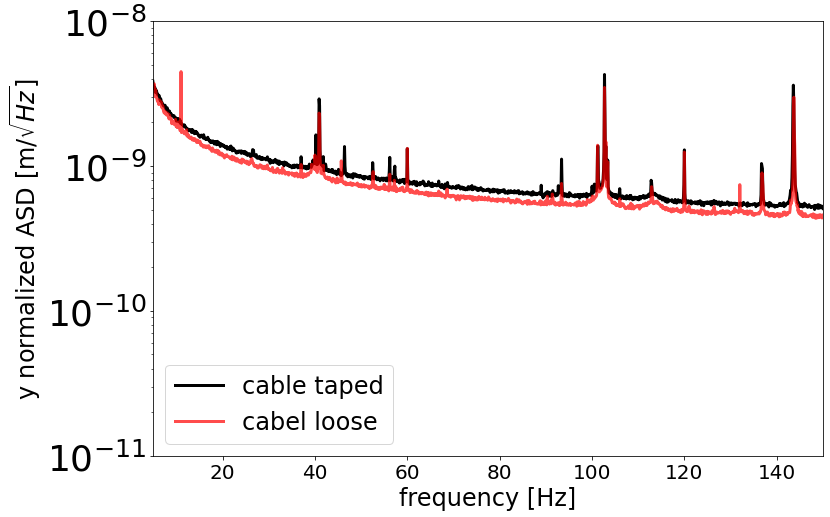

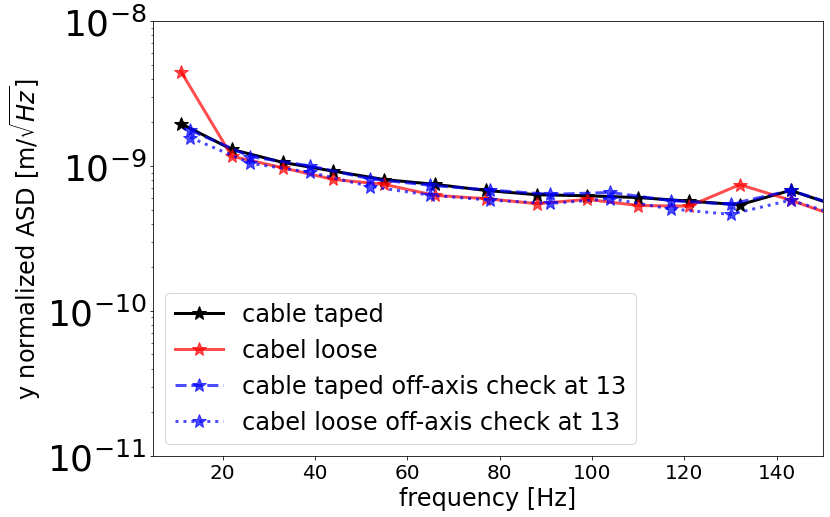

In [21]:
plot_compare_amplitudes_tot(11,df_Shaking11_1,df_Shaking11_2,label1="cable taped",label2="cabel loose",method="ASD",lowxlim=5,upylim=1e-8)

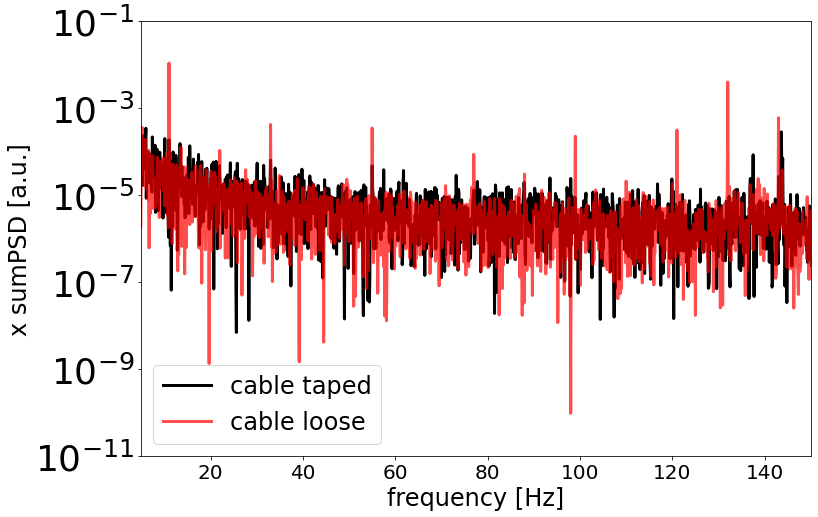

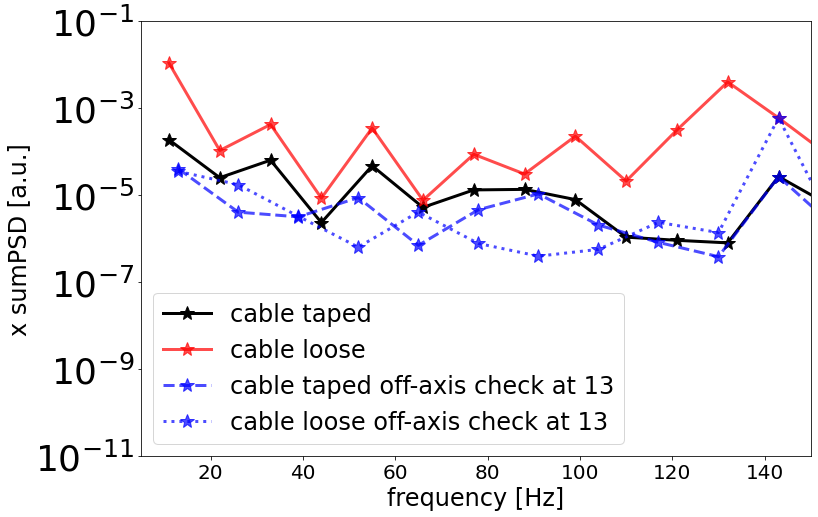

In [24]:
plot_compare_amplitudes_tot(11,df_Shaking11_1,df_Shaking11_2,axis="x",label1="cable taped",label2="cable loose",method="Alternate",lowxlim=5,upylim=1e-1)

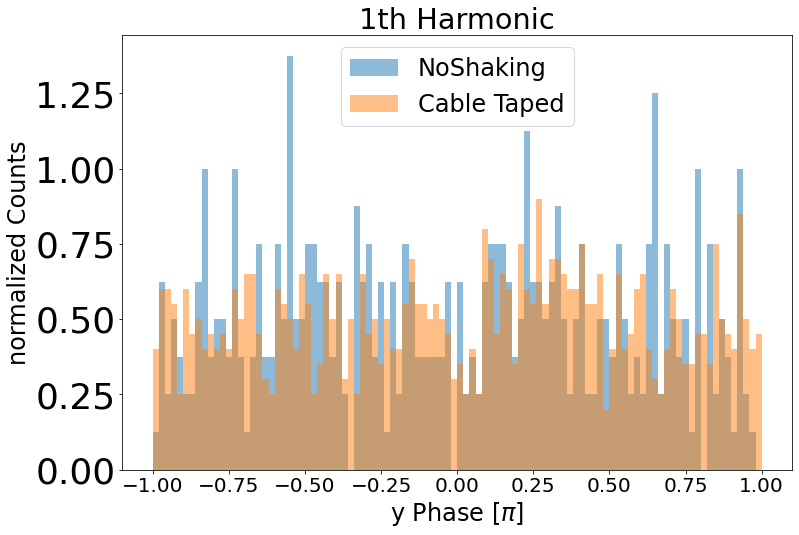

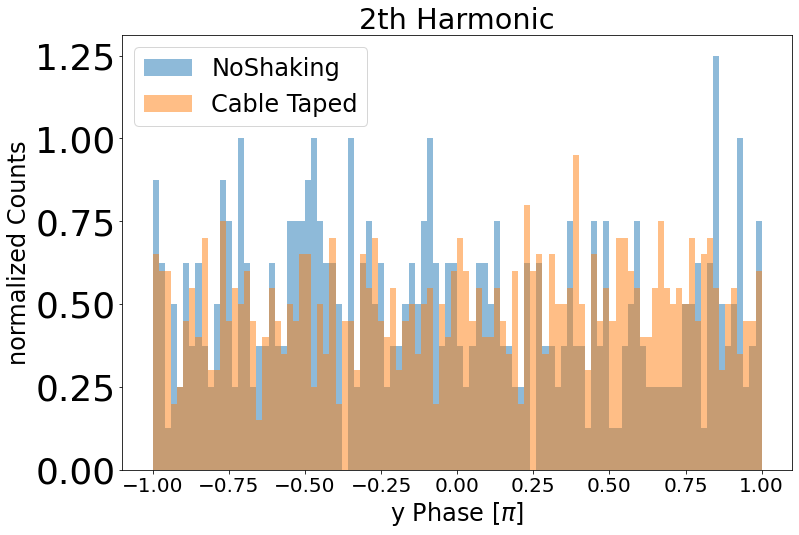

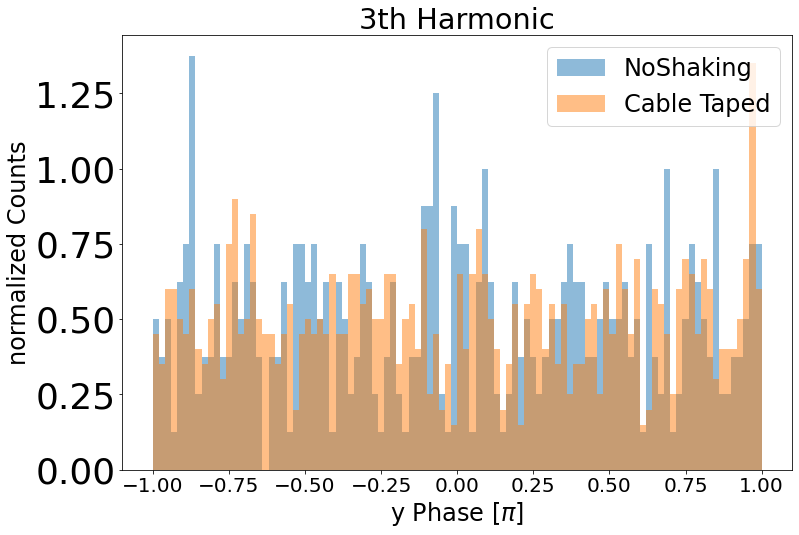

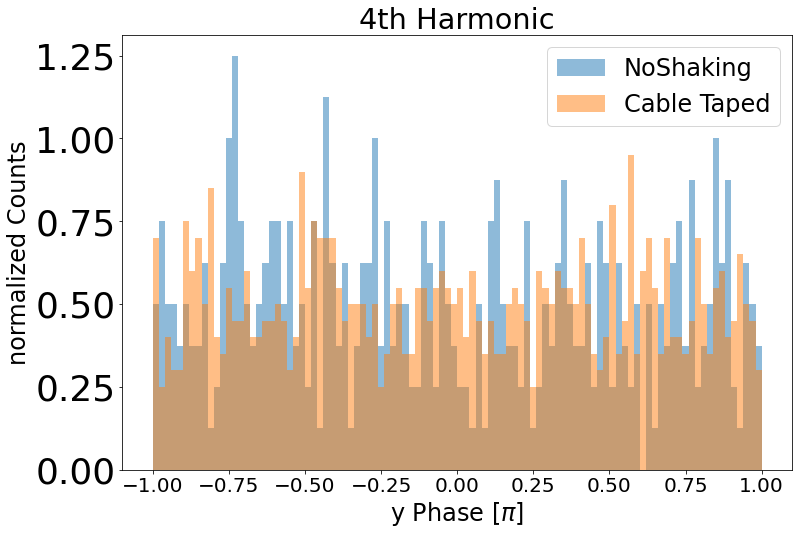

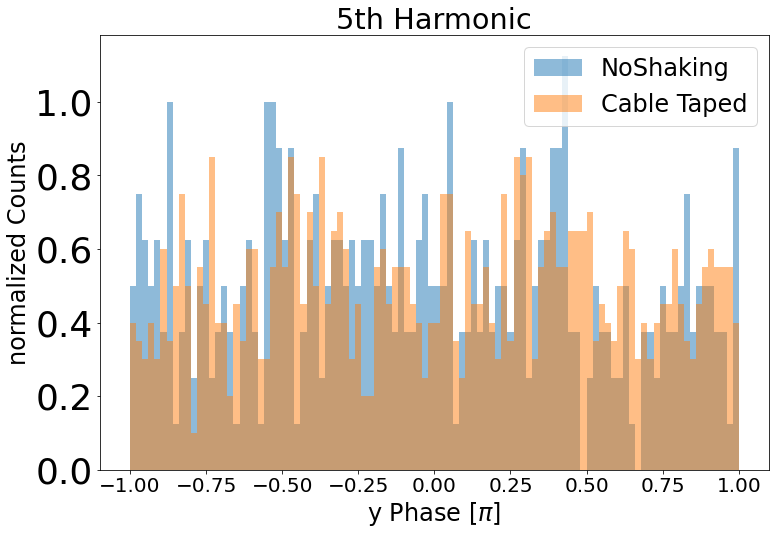

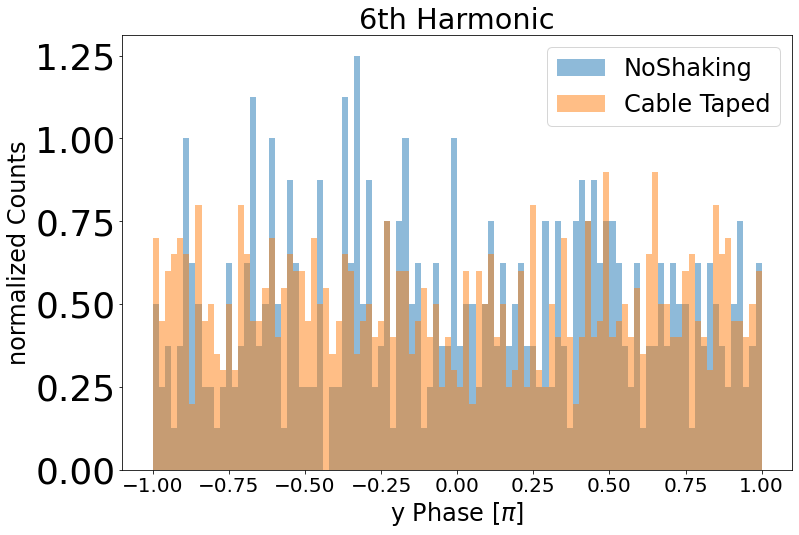

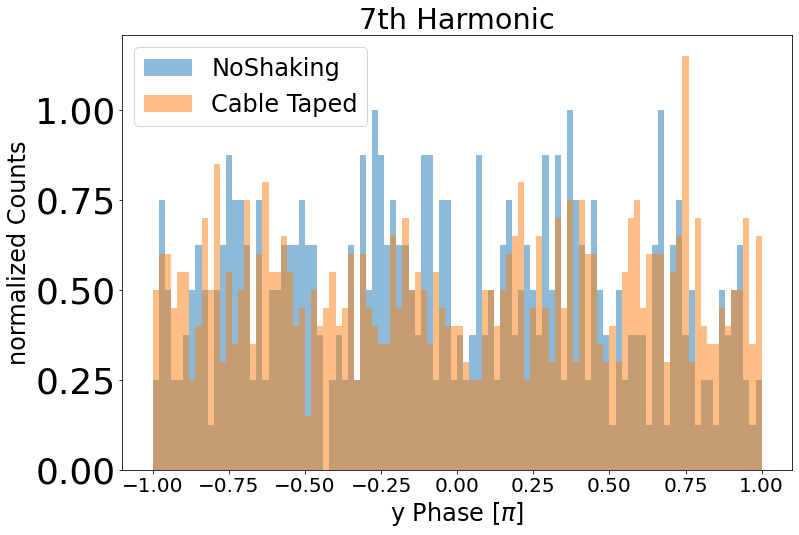

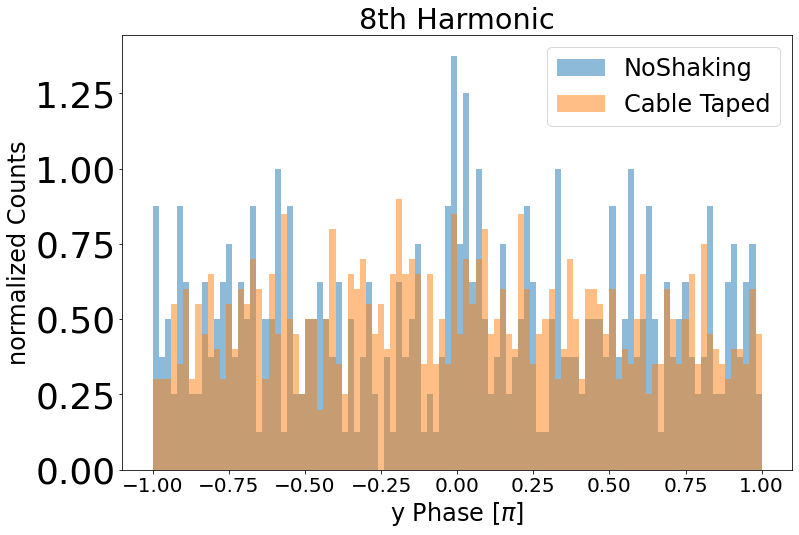

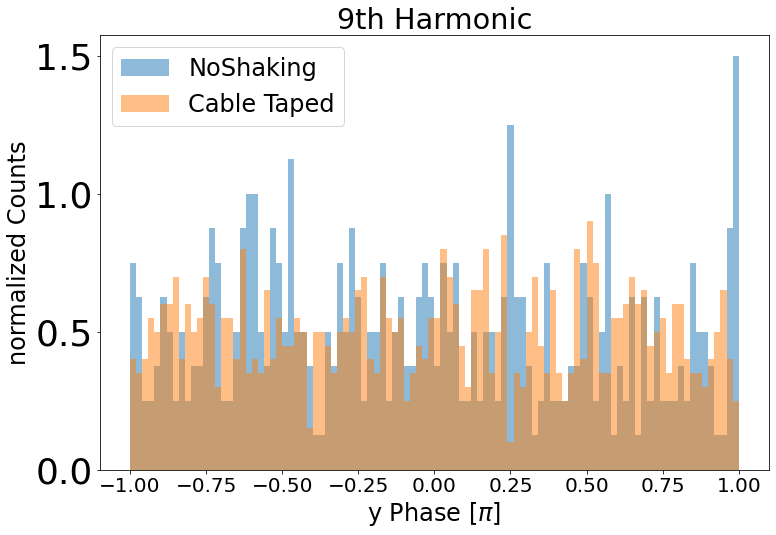

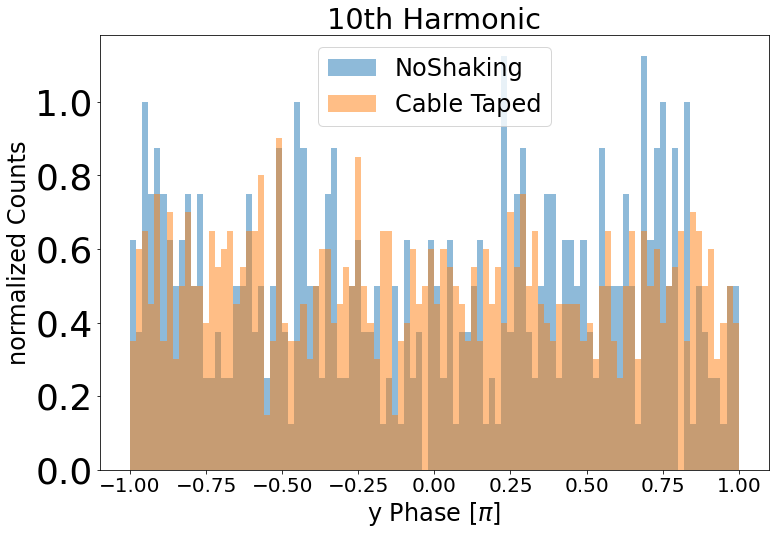

In [23]:
plot_compare_phases_all(11,dfs=[df_NoShaking_1,df_Shaking11_1],labels=["NoShaking","Cable Taped"])

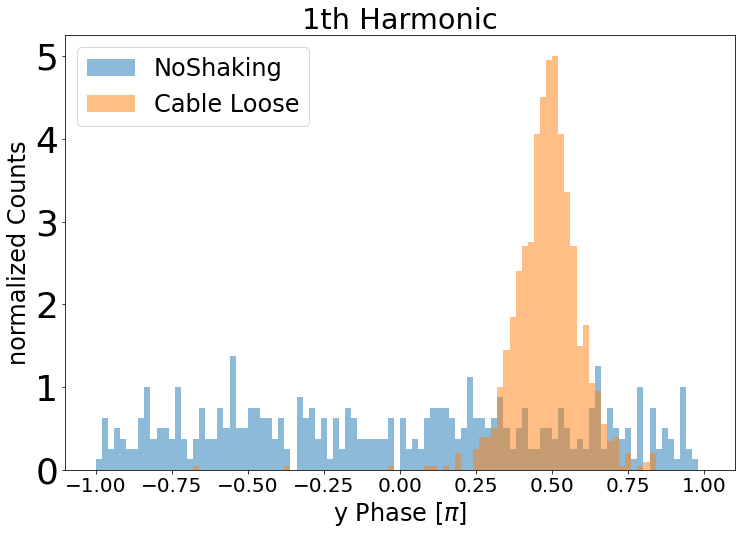

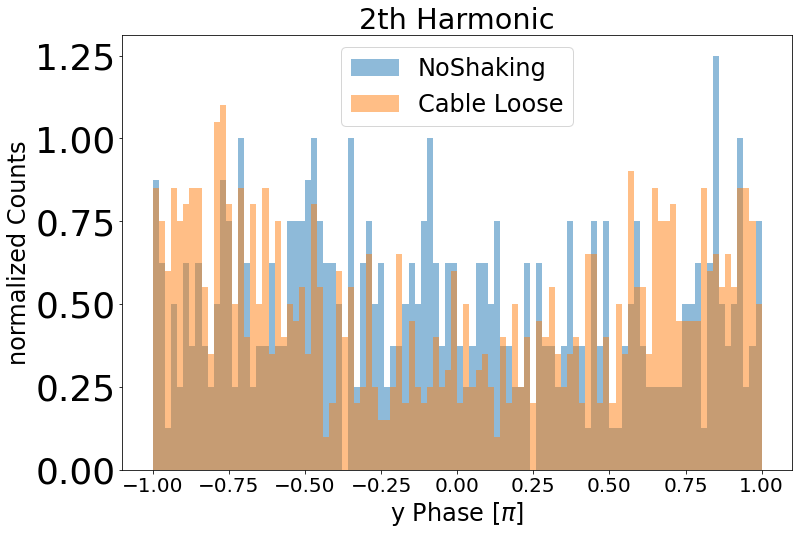

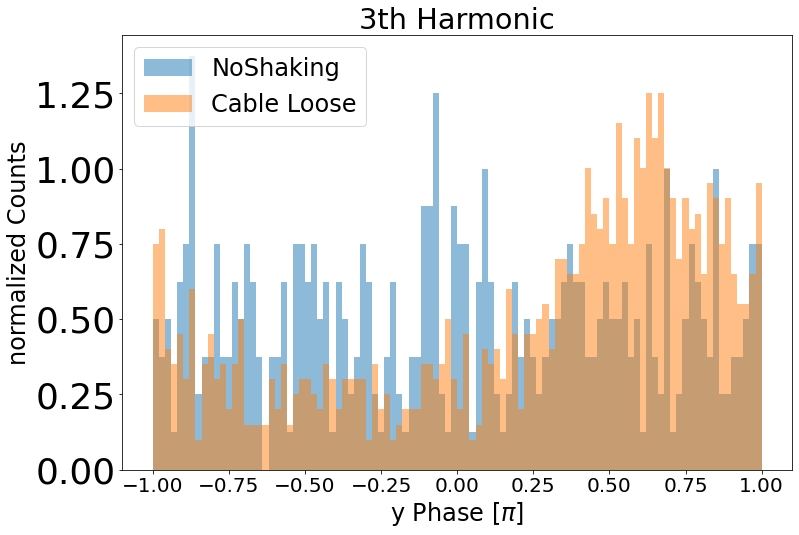

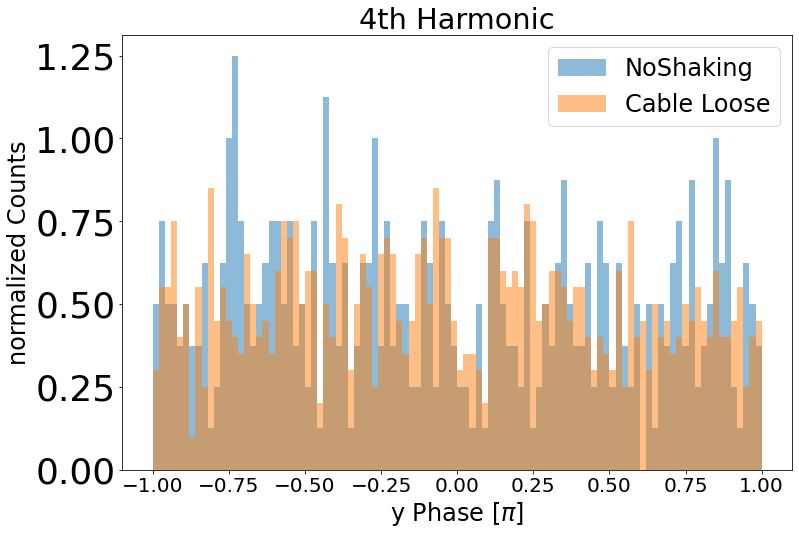

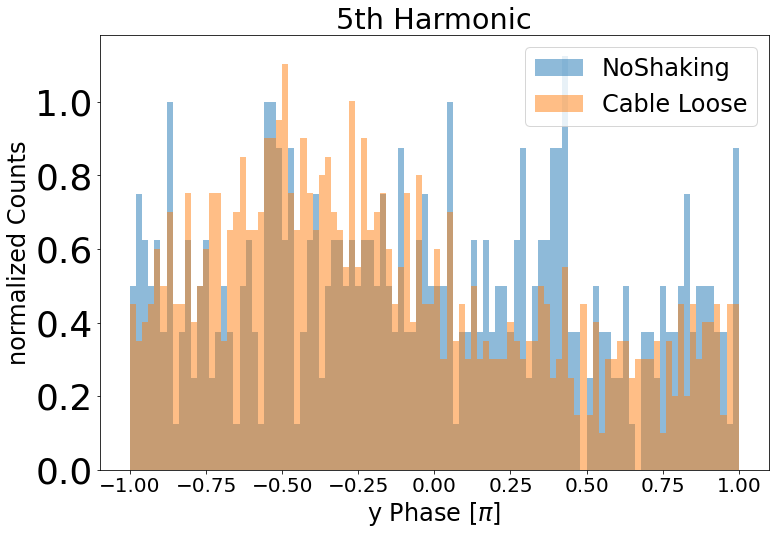

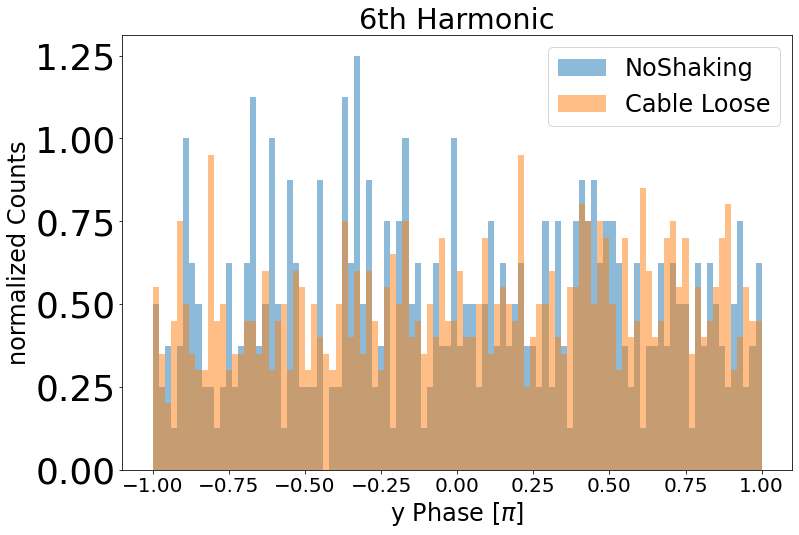

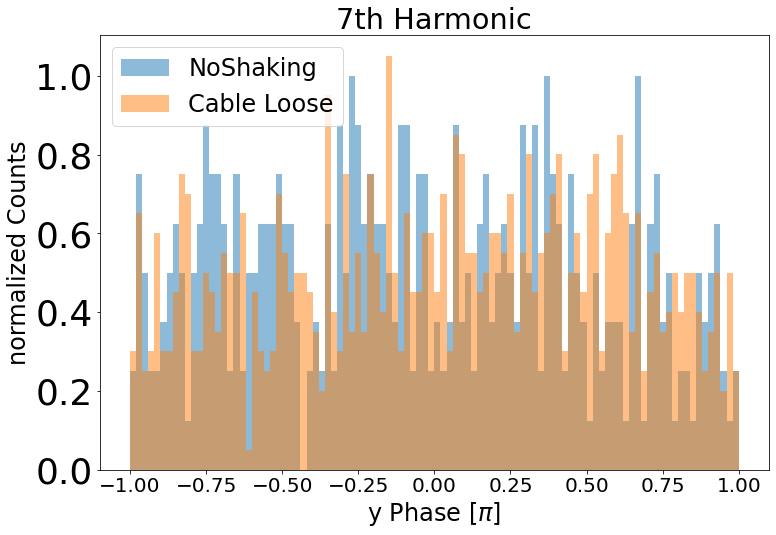

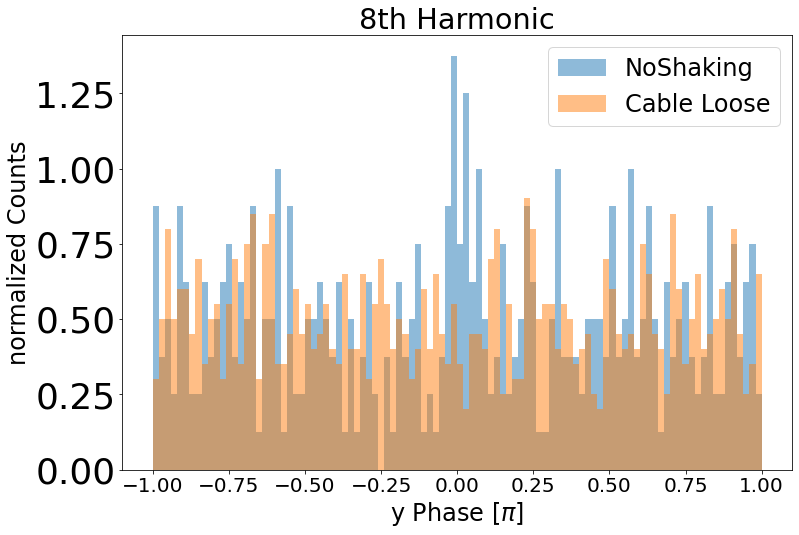

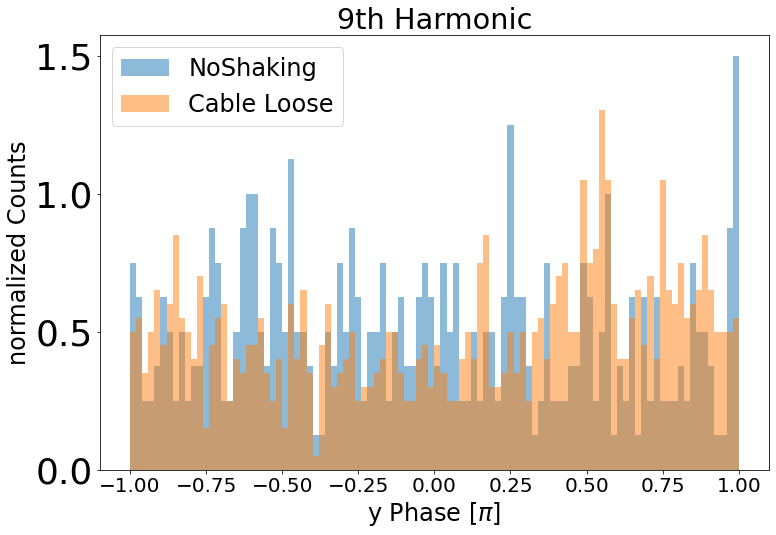

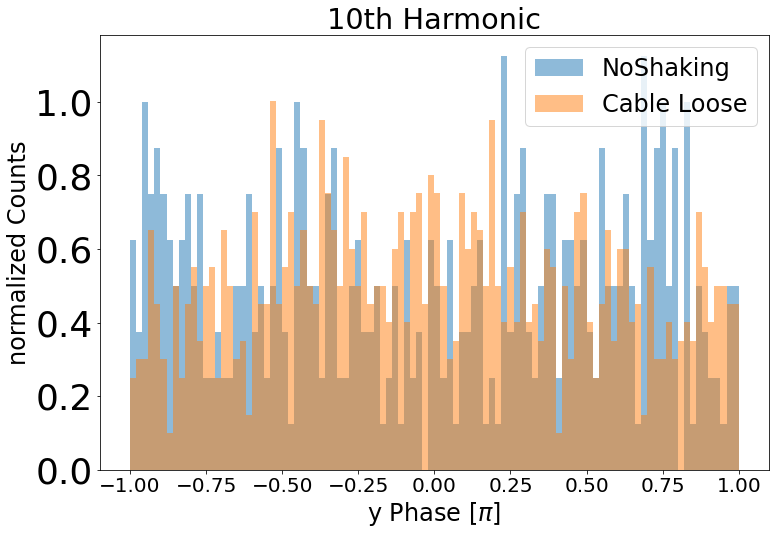

In [25]:
plot_compare_phases_all(11,dfs=[df_NoShaking_1,df_Shaking11_2],labels=["NoShaking","Cable Loose"])

In [14]:
folderName="/data/new_trap/20220630/Shaking/1/" 
filePrefix="Shaking"
freqs,df_Shaking11_3= extract_data_to_df(folderName,filePrefix,maxFiles=3000,filterStd=True,calibrationFactorX=calibrationFactorX,calibrationFactorY=calibrationFactorY)
#df_Shaking3_1.to_pickle("Results/Shaking_1_20220617.npy")


1000
The process took 63.50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
index       1000 non-null int64
cantPosY    1000 non-null object
xAmp        1000 non-null object
xPhase      1000 non-null object
xPSD        1000 non-null object
yAmp        1000 non-null object
yPhase      1000 non-null object
yPSD        1000 non-null object
checkStd    1000 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5 GB
None


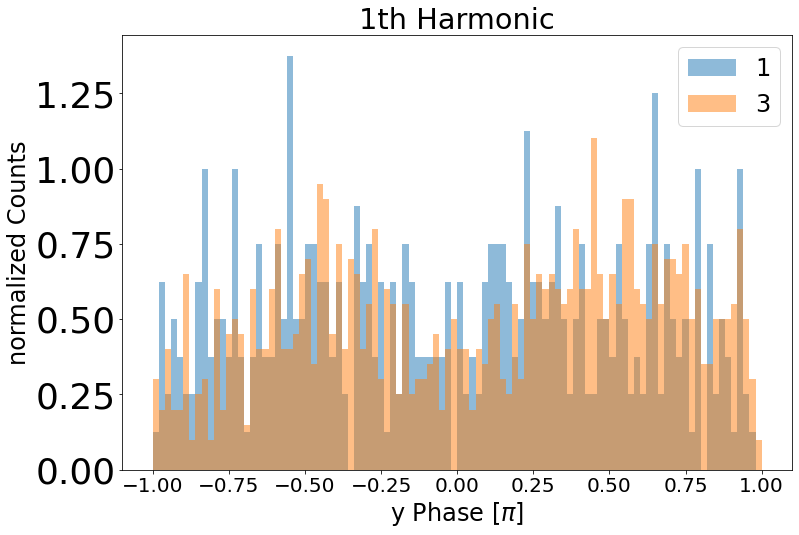

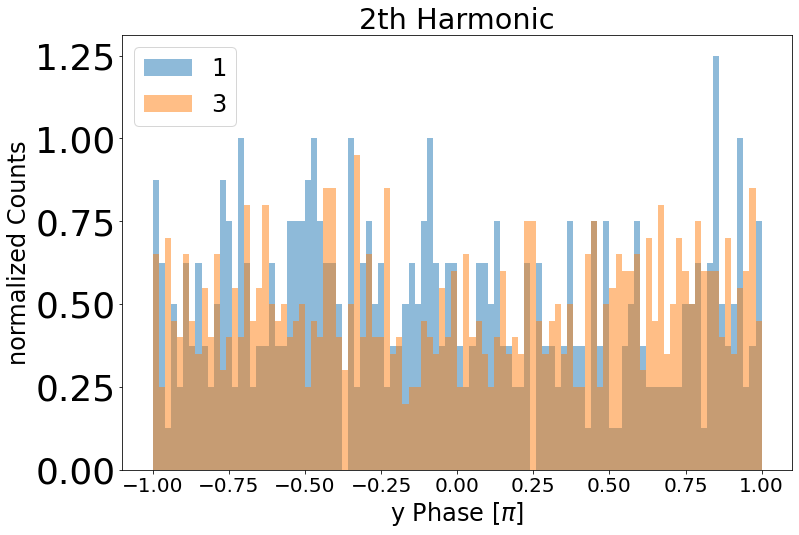

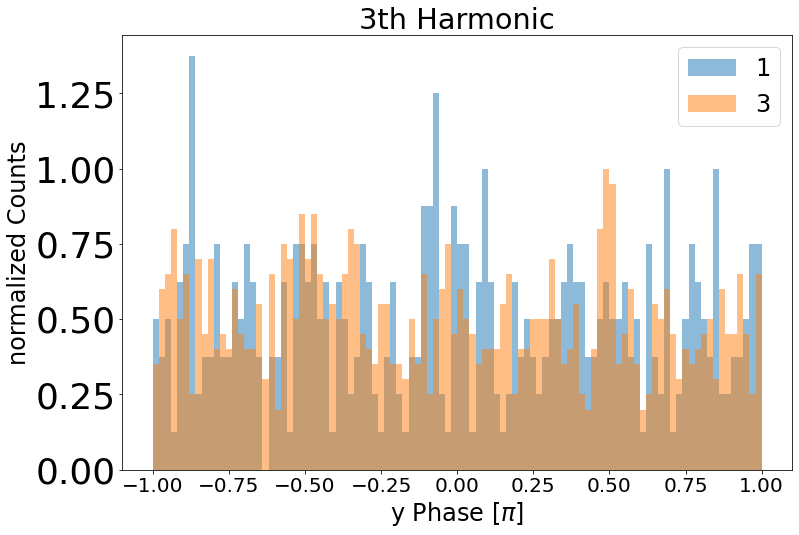

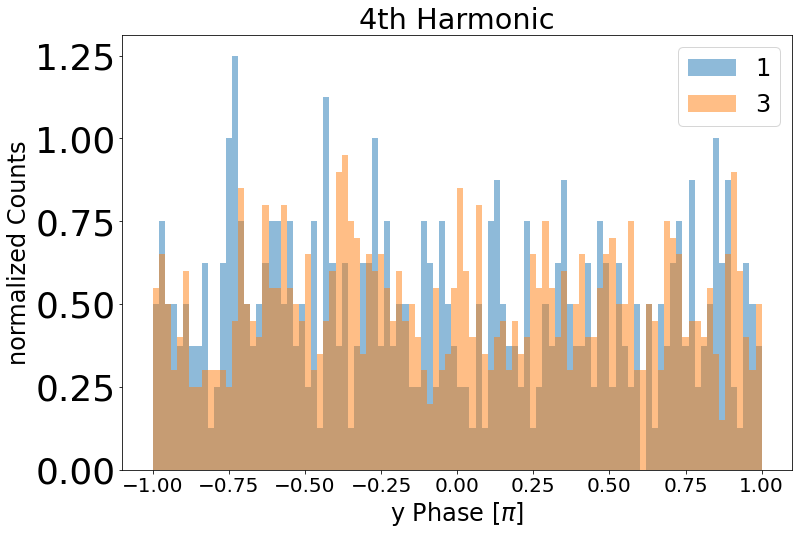

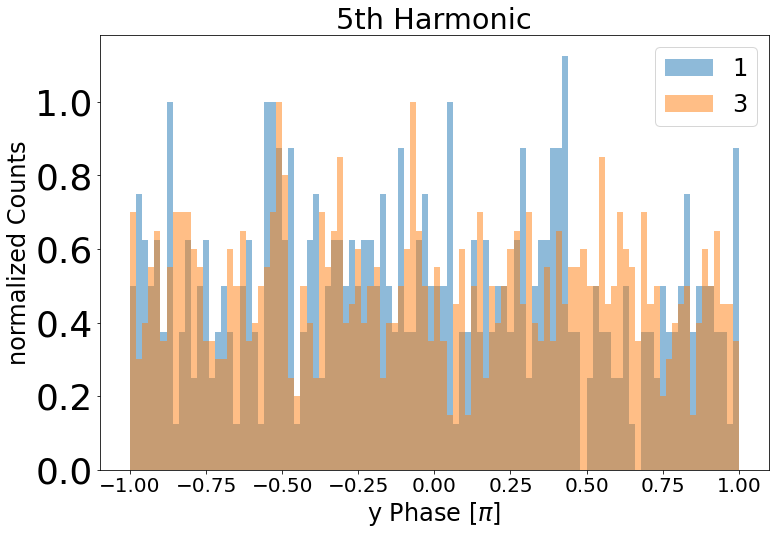

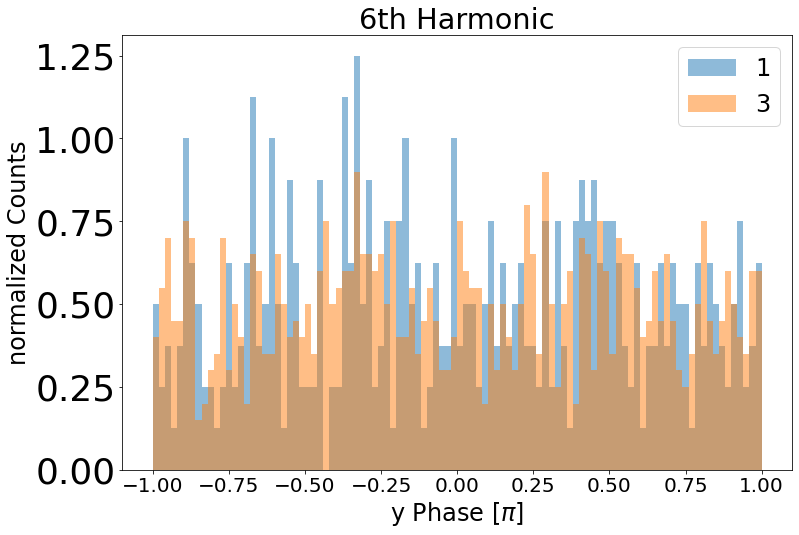

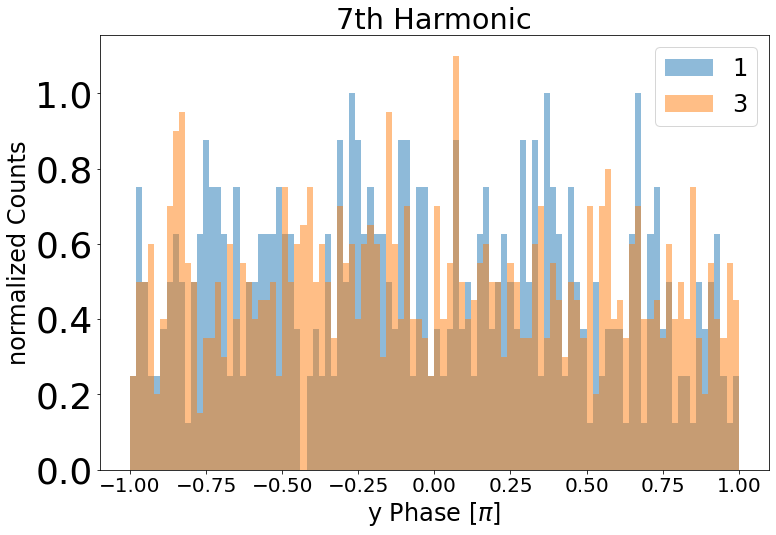

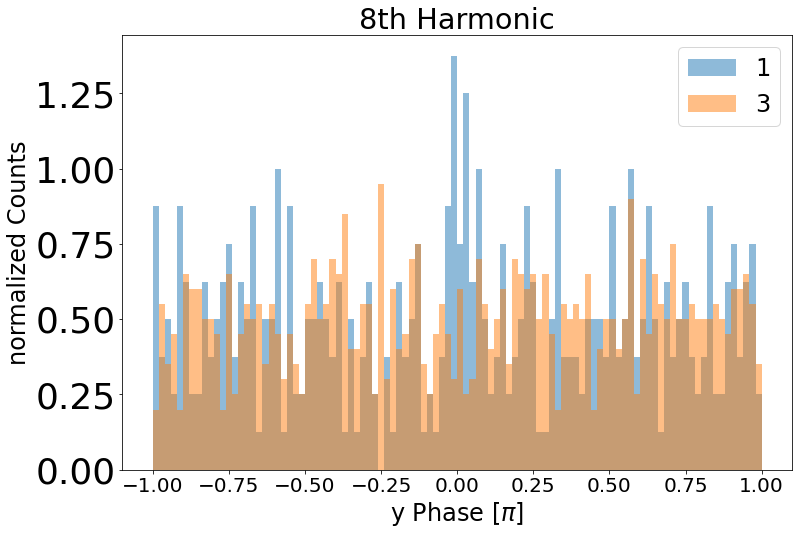

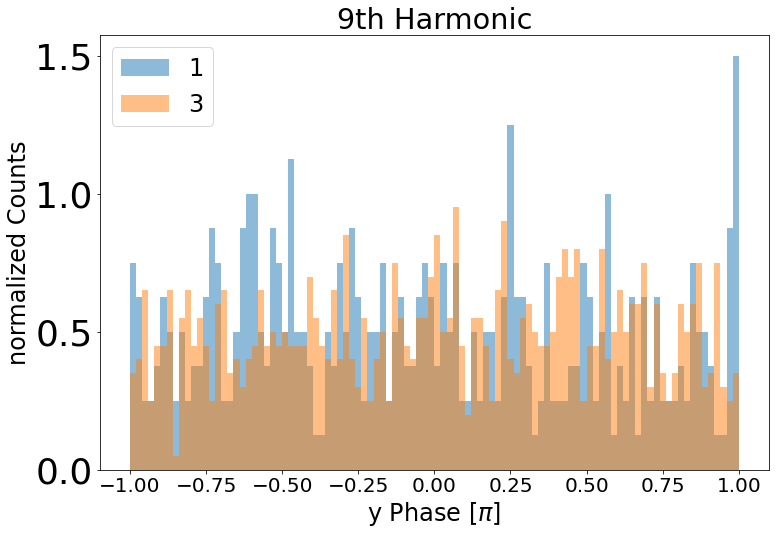

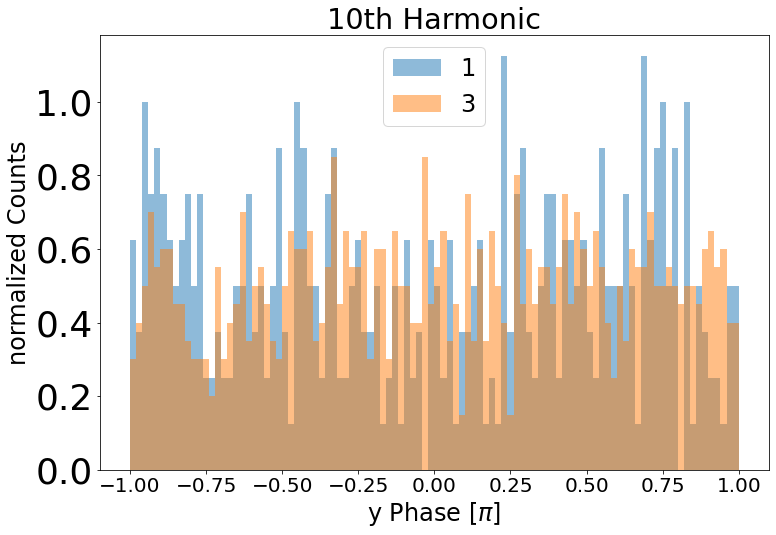

In [15]:
plot_compare_phases_all(11,dfs=[df_NoShaking_1,df_Shaking11_3],labels=["1","3","4","5"])

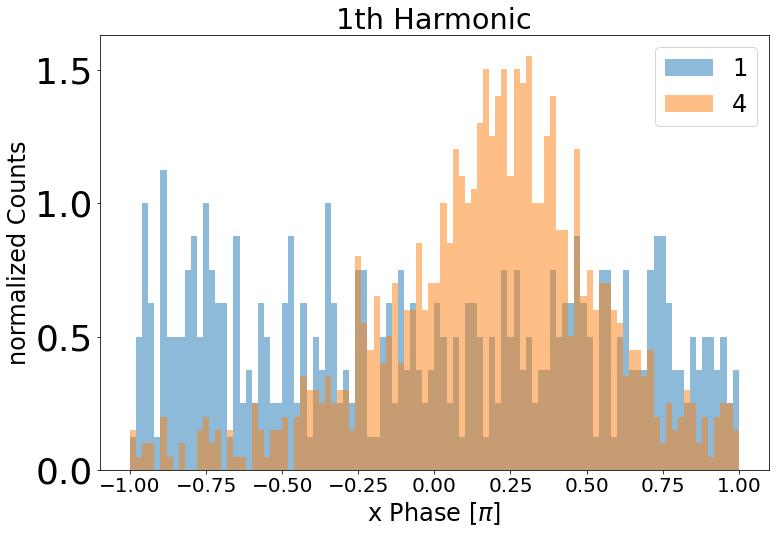

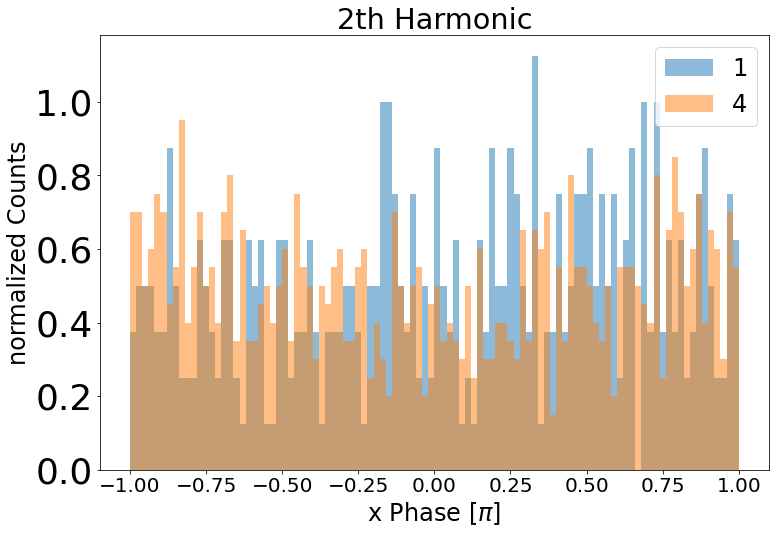

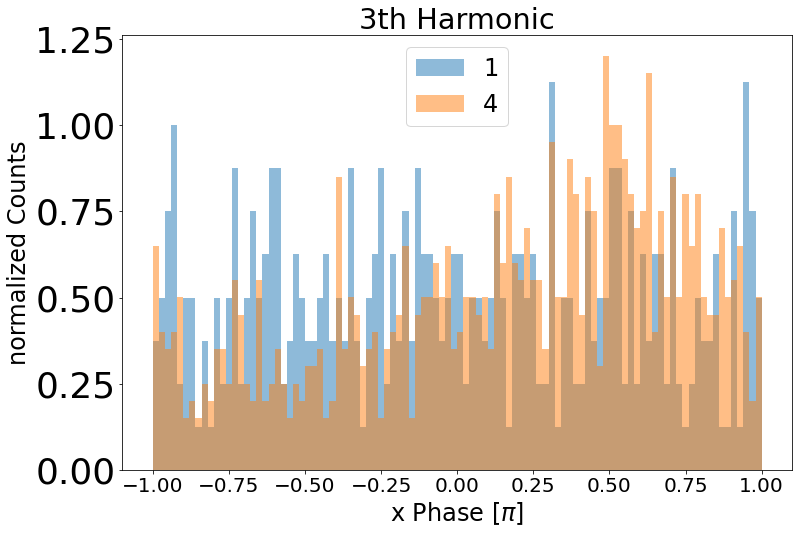

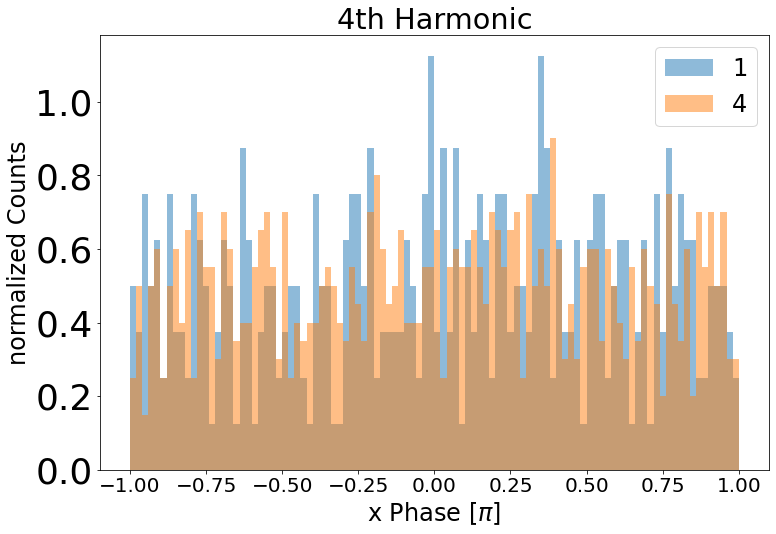

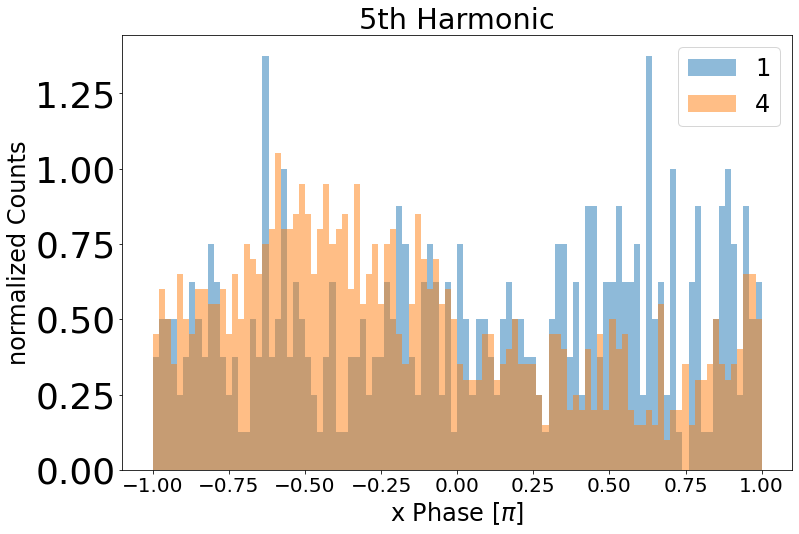

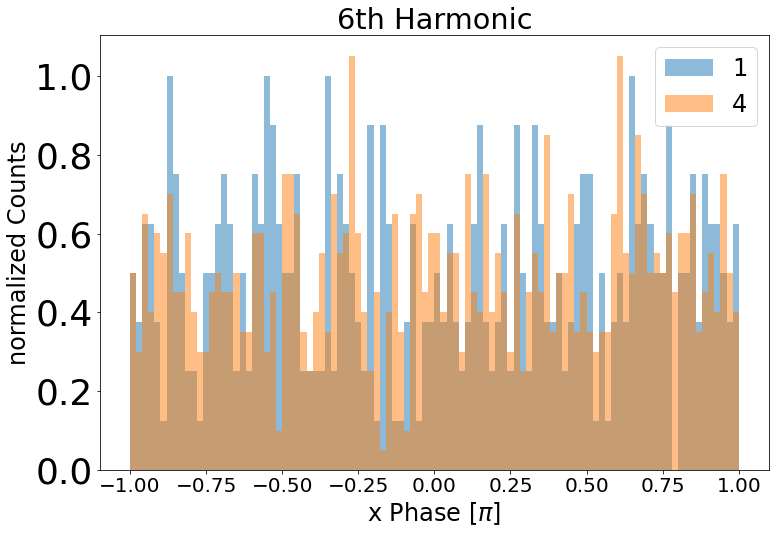

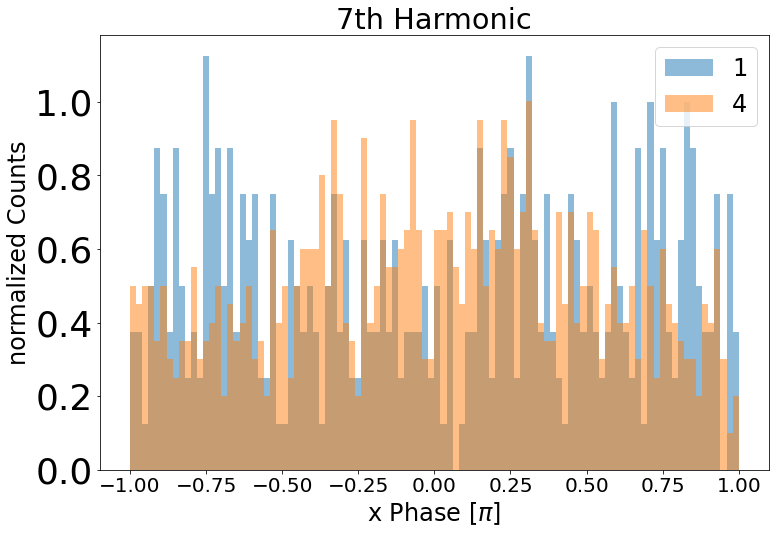

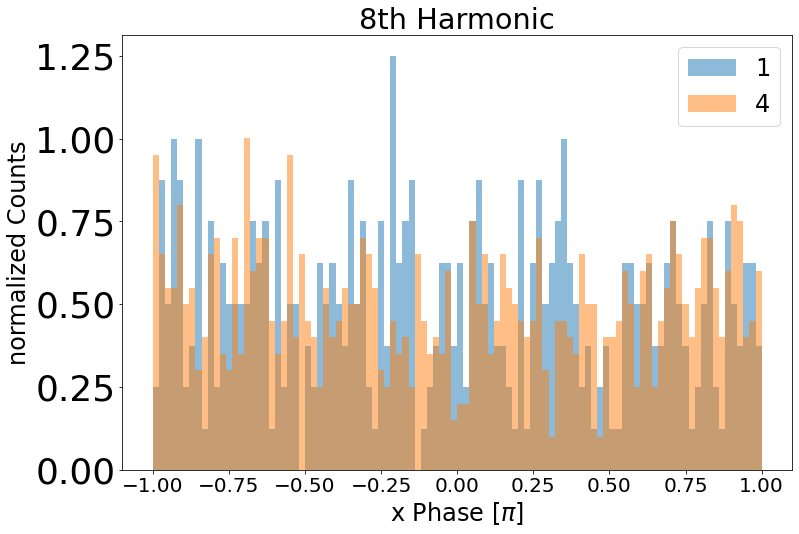

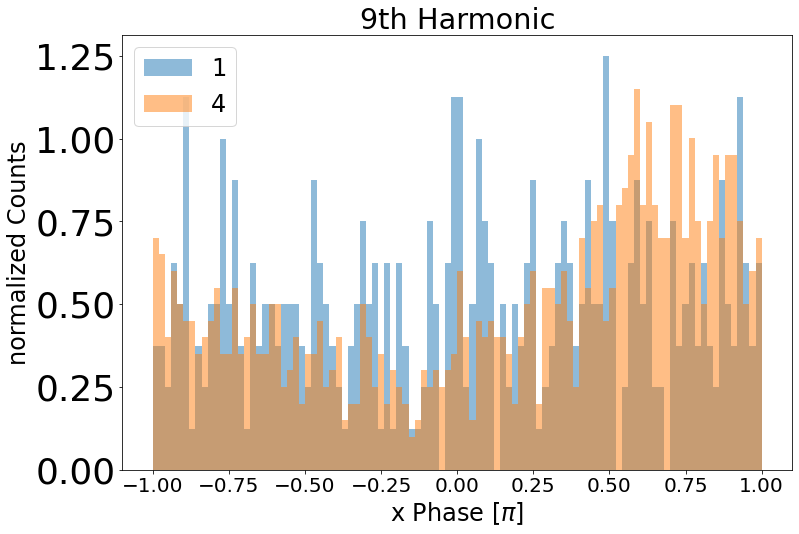

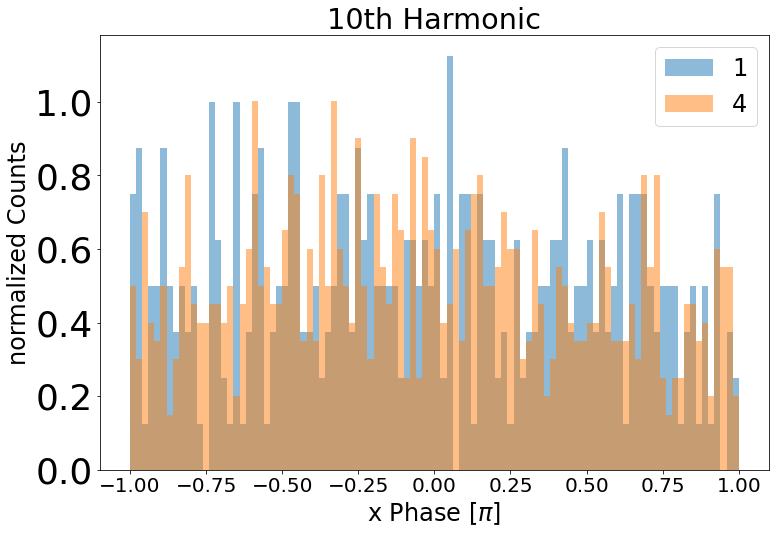

In [16]:
plot_compare_phases_all(11,dfs=[df_NoShaking_1,df_Shaking11_2],labels=["1","4"],axis="x")

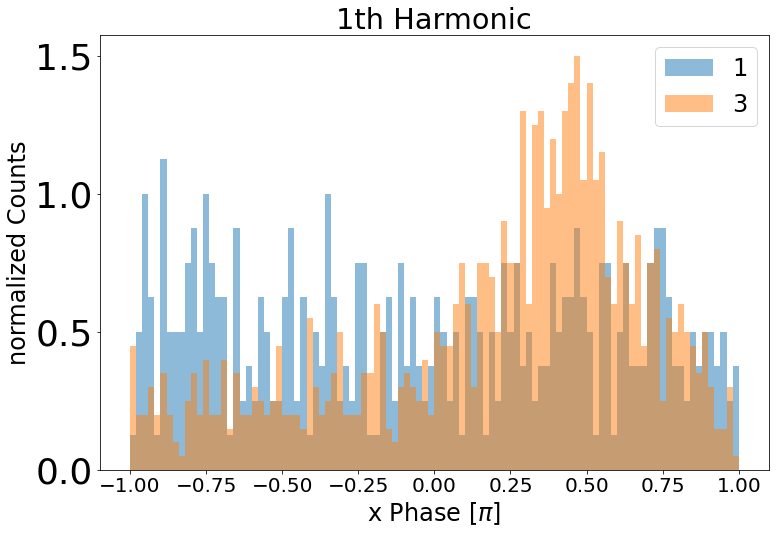

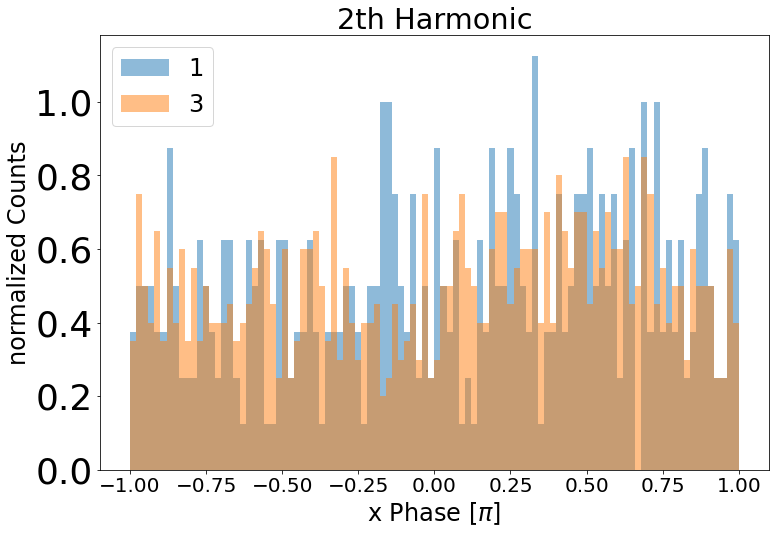

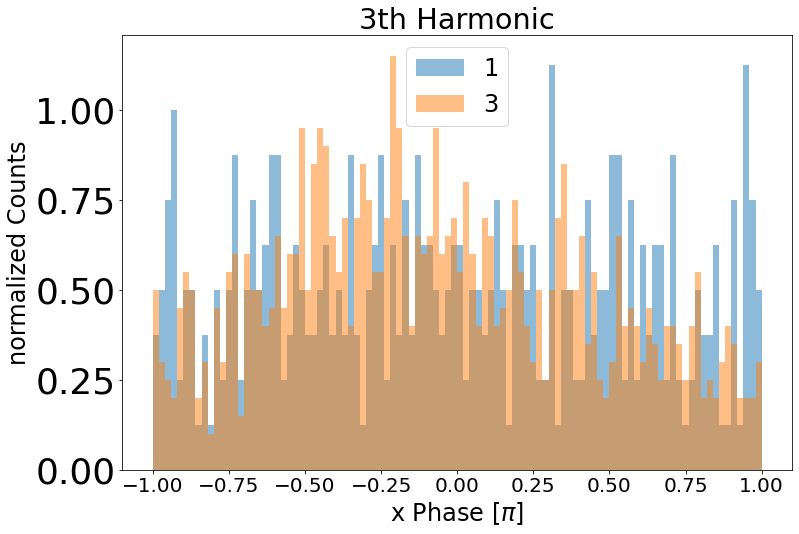

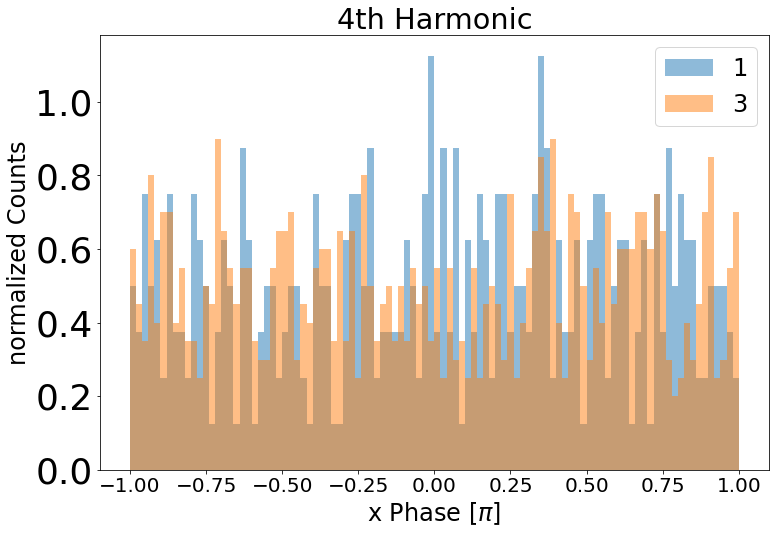

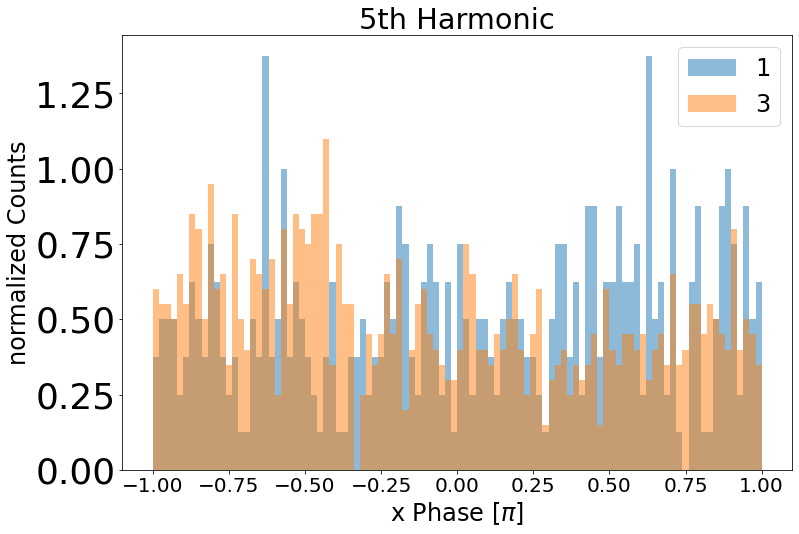

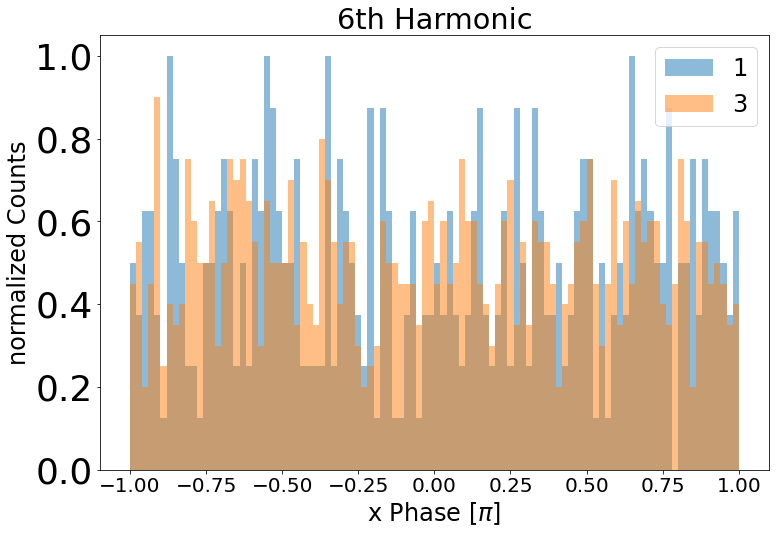

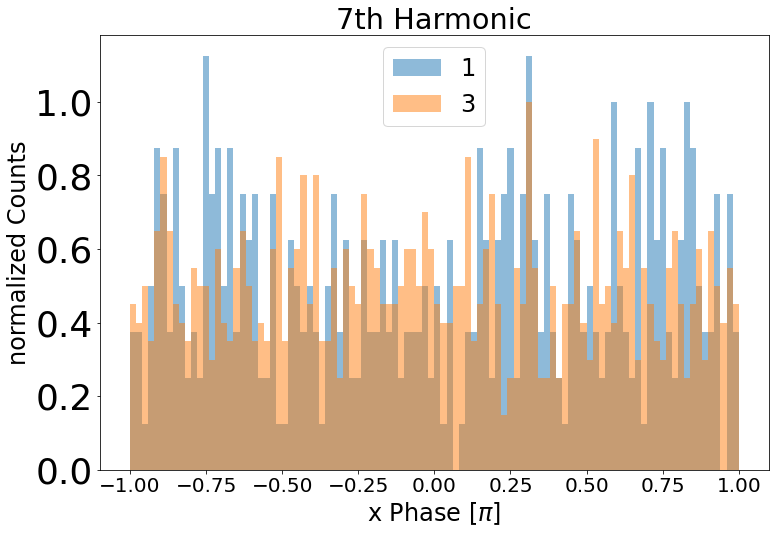

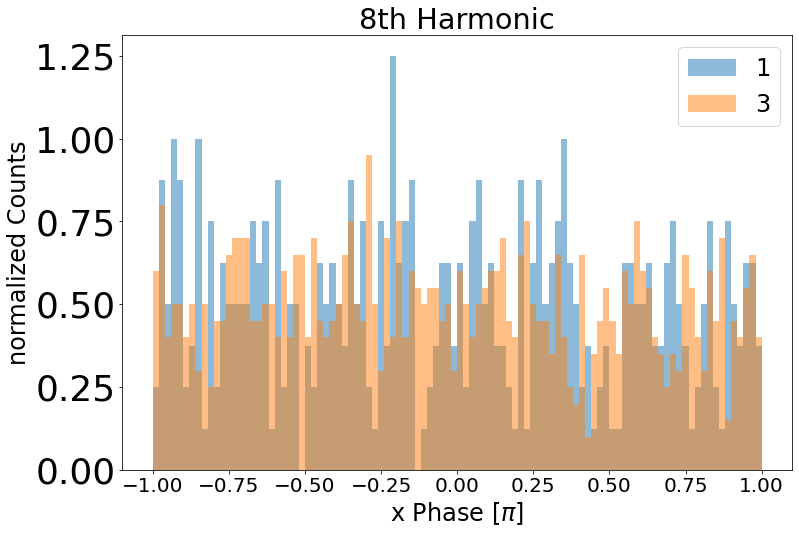

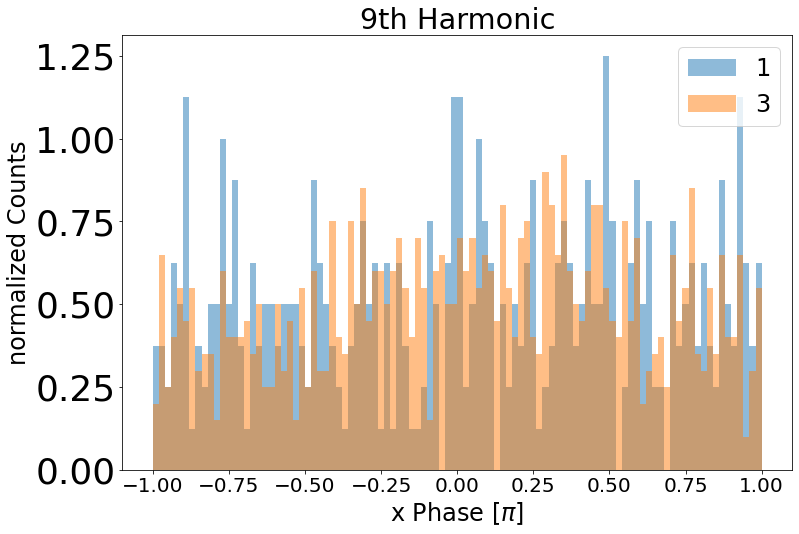

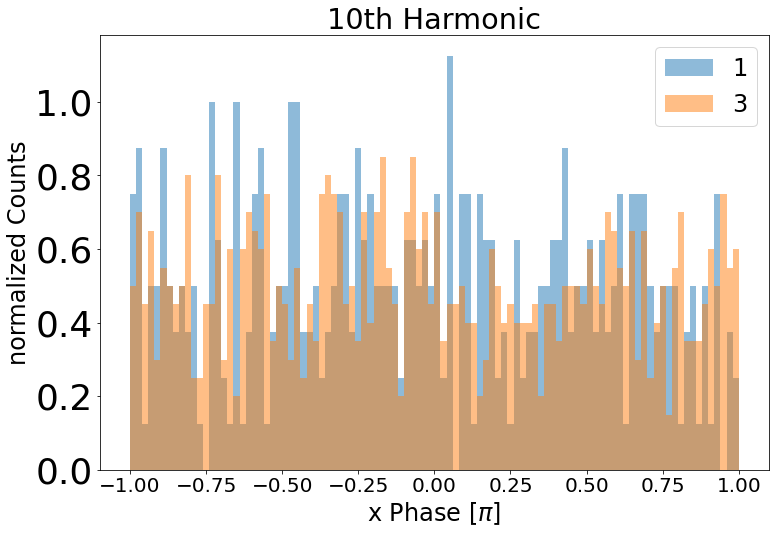

In [18]:
plot_compare_phases_all(11,dfs=[df_NoShaking_1,df_Shaking11_2],labels=["1","3"],axis="x")